**<h3><center>EN2550 Assignment 3</center></h3>**
*Name - Ekanayake E.M.S.S.N.*
<br>
*Index no - 190164M*
<br>
GitHub - 
<br>

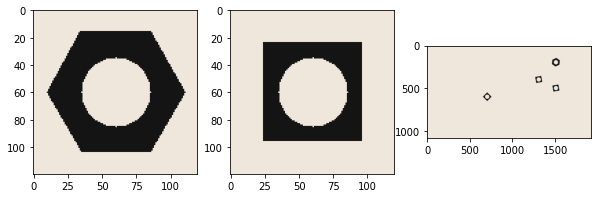

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

<h4><b>Q: Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image</b></h4>

Threshold for hexnut template = 20.0
Threshold for squarenut template = 20.0
Threshold for conveyor = 20.0


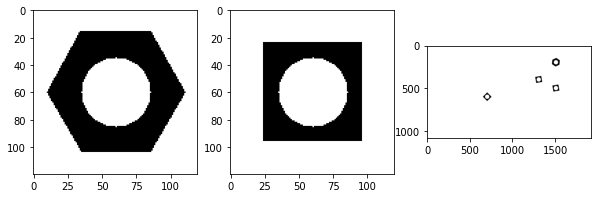

In [3]:
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret1,hexnut_bin = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,squarenut_bin = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,conveyor_bin = cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold for hexnut template = "+str(ret1))
print("Threshold for squarenut template = "+str(ret2))
print("Threshold for conveyor = "+str(ret3))

fig, ax = plt. subplots(1,3, figsize = (10,10))
ax[0].imshow(hexnut_bin,'gray', vmin=0, vmax=255)
ax[1].imshow(squarenut_bin,'gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_bin,'gray', vmin=0, vmax=255)
plt.show()


<h4><b>Q: Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel</h4></b>

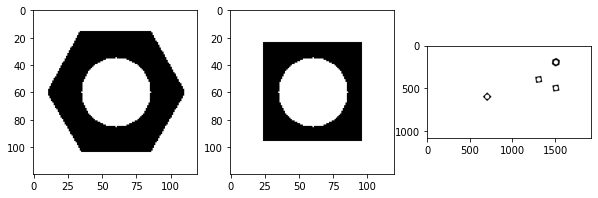

In [4]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

bin_list = [hexnut_bin, squarenut_bin, conveyor_bin]
closed_list = []
fig, ax = plt. subplots(1,3, figsize = (10,10))
for i in range(3):
    closed_list.append(cv.morphologyEx(bin_list[i], cv.MORPH_CLOSE, kernel))
    ax[i].imshow(closed_list[i],'gray', vmin=0, vmax=255)
    

<h4><b>Q: Connected components analysis: apply the <i>connectedComponentsWithStats</i> function and display the outputs as colormapped images. <br>How many connected components are detected in each image?<br>
What are the centroids?
</h4></b>

Image 1
 No. of components(including BG) :2
 Coordinates of centroid = 59.83,59.22
 Area = 4722
Image 2
 No. of components(including BG) :2
 Coordinates of centroid = 59.20,59.20
 Area = 3223
Image 3
 No. of components(including BG) :5
 Coordinates of centroid = 1499.24,199.28
 Area = 4628
 Coordinates of centroid = 1299.18,399.18
 Area = 3083
 Coordinates of centroid = 1499.18,499.18
 Area = 3083
 Coordinates of centroid = 700.00,600.00
 Area = 3136


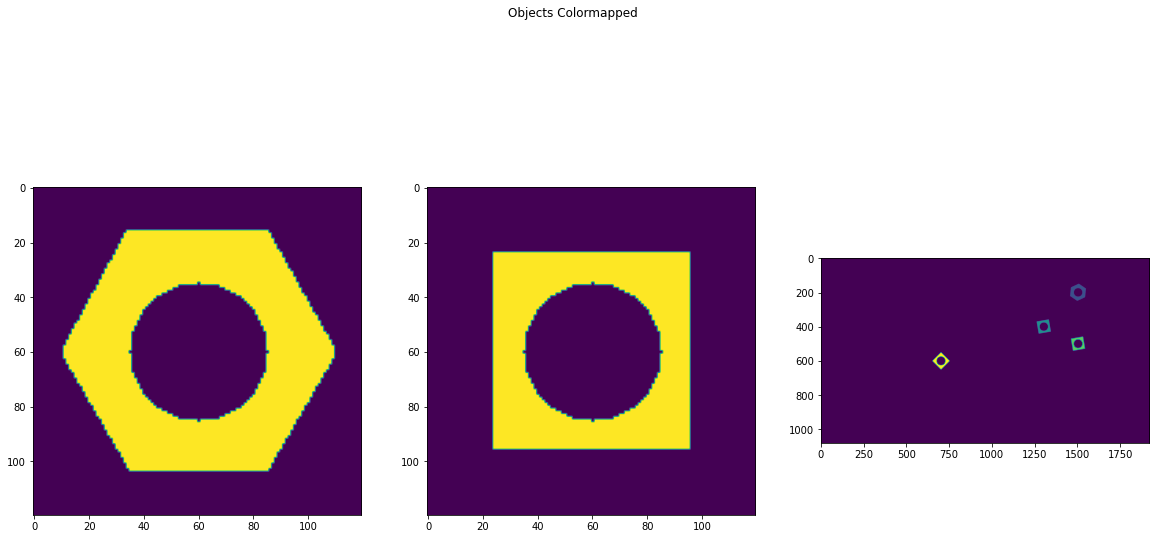

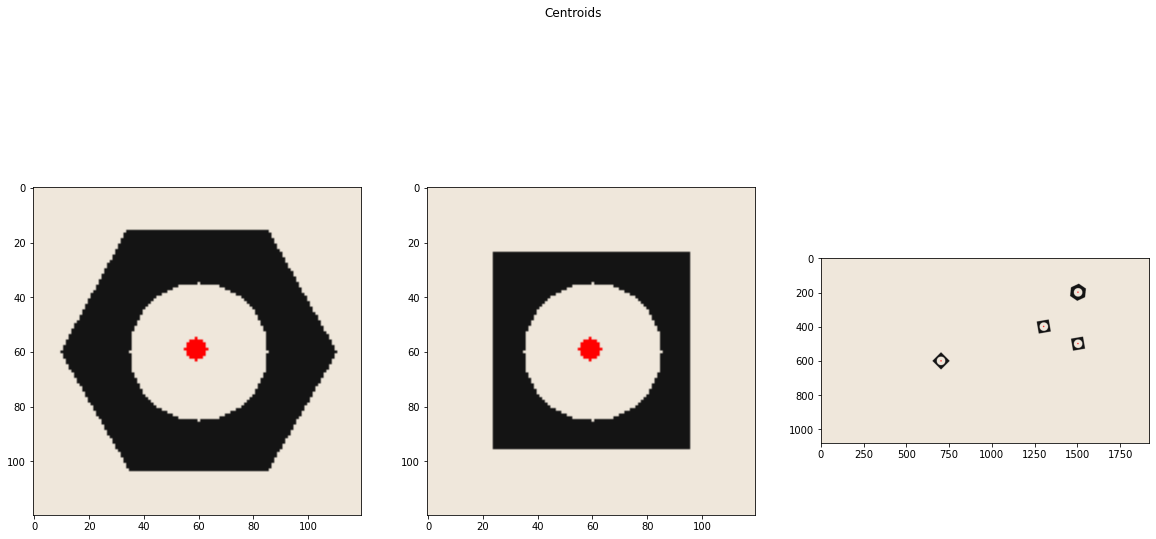

In [5]:
binary_image_list = []
output_list = []
masked_images = []
original_image_list = [hexnut_template, squarenut_template, conveyor_f100]

#inverting the images to get white foreground and black background
for im in closed_list:
    binary_image_list.append(cv.bitwise_not(im))

for i in range(3):
    output_list.append(cv.connectedComponentsWithStats(binary_image_list[i], 8, cv.CV_32S))
    (numLabels, labels, stats, centroids) = output_list[i]
    masked_images.append(labels)
    print("Image "+str(i+1)+"\n No. of components(including BG) :"+str(numLabels))
    for j in range(numLabels):
        if j!=0:
            area = stats[j, cv.CC_STAT_AREA]
            (cX, cY) = centroids[j]  
            print(" Coordinates of centroid = "+str("{:.2f}". format(cX))+","+str("{:.2f}". format(cY)))
            print(" Area = "+str(area))
            cv.circle(original_image_list[i], (int(cX), int(cY)), 4, (0, 0, 255), -1)
    
fig, ax = plt. subplots(1,3, figsize = (20,10))
plt.suptitle("Objects Colormapped")
for i in range(3):
    ax[i].imshow(masked_images[i])

fig, ax = plt. subplots(1,3, figsize = (20,10))
plt.suptitle("Centroids")
for i in range(3):
    ax[i].imshow(cv.cvtColor(original_image_list[i], cv.COLOR_RGB2BGR))       



<h4><b>Q: What are the statistics? Interpret these statistics.</h4></b>

3rd output of <i>connectedComponentsWithStats</i> gives statistics on each connected component, including the bounding box coordinates and area (in pixels). In the output matrix, each row represents each component. Columns represent starting x coordinate, starting y coordinate, width, height and area respectively. Thet can be accessed as following.<br> 
x = stats[label, cv2.CC_STAT_LEFT] - Starting X coordinate of the component<br> 
	y = stats[label, cv2.CC_STAT_TOP] - Starting Y coordinate of the component<br> 
	w = stats[label, cv2.CC_STAT_WIDTH] - Width of the component<br> 
	h = stats[label, cv2.CC_STAT_HEIGHT] - Height of the component<br> 
	area = stats[label, cv2.CC_STAT_AREA]<br>

In [6]:
for i in range(3):
    print("\n Image "+str(i+1))
    print(output_list[i][2])


 Image 1
[[   0    0  120  120 9678]
 [  11   16   99   88 4722]]

 Image 2
[[    0     0   120   120 11177]
 [   24    24    72    72  3223]]

 Image 3
[[      0       0    1920    1080 2059670]
 [   1454     151      92      98    4628]
 [   1259     359      82      82    3083]
 [   1459     459      82      82    3083]
 [    651     551      99      99    3136]]


<h4><b>Q: Contour analysis: Use findContours function to retrieve the extreme outer contours</h4></b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


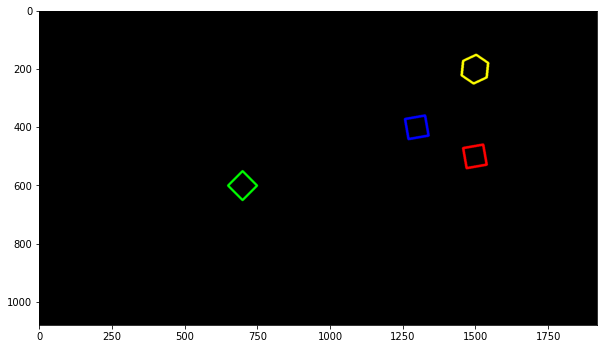

In [7]:
colors = [(0,255,0),(255,0,0),(0,0,255),(255,255,0)]
blank = np.zeros(conveyor_f100.shape)
contours, hierarchy = cv.findContours(binary_image_list[2], cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
extr_outer_contours = [contours[i] for i in [0,2,4,6]]      #selecting extreme outer contours
for j in range(4):
    cv.drawContours(blank, extr_outer_contours[j], -1, colors[j],7)
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(blank)
plt.show()


<h4><b>Detecting Objects on a Synthetic Conveyor</h4></b>

In [24]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
frames = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    frames.append(np.copy(frame))
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


<h4><b>Q: Count the number of matching hexagonal nuts in conveyor_f100.png</h4></b>

In [25]:
hex_contour, hex_hierarchy = cv.findContours(binary_image_list[0], cv.RETR_TREE, cv.CHAIN_APPROX_NONE)  #hex nut template contour
sq_contour, sq_hierarchy = cv.findContours(binary_image_list[1], cv.RETR_TREE, cv.CHAIN_APPROX_NONE)  #square nut template contour
hex_contour = hex_contour[0]
sq_contour = sq_contour[0]
count = 0

for  i in extr_outer_contours:
    ret = cv.matchShapes(hex_contour,i,1,0.0)
    if ret<0.01:
        count+=1
print("Count of hexagonal nuts: "+str(count))

Count of hexagonal nuts: 1


<h4><b>Q: Count the number of objects that were conveyed along the conveyor belt</b></h4>

In [26]:
shape = (1080, 1920, 3)
hx_total_det = 0
hx_detected = []
sq_total_det = 0
sq_detected = []
for fr in frames[:-1]:
    hx_frame_total = 0
    sq_frame_total = 0
    fr_gray = cv.cvtColor(fr, cv.COLOR_BGR2GRAY)
    ret,fr_bin = cv.threshold(fr_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    fr_contours, fr_hierarchy = cv.findContours(fr_bin, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    for i in fr_contours:
        ret_1 = cv.matchShapes(hex_contour,i,1,0.0)
        ret_2 = cv.matchShapes(sq_contour,i,1,0.0)
        if ret_1<0.01 and abs(cv.contourArea(i)-cv.contourArea(hex_contour))<=800:
            hx_frame_total += 1
            if hx_frame_total>hx_total_det:
                hx_total_det = hx_frame_total
            for d in hx_detected:
                if np.sum(d)-np.sum(i)<7500:
                    pass
                else:
                    hx_total_det+=1
                    hx_detected.append(i)

        if ret_2<0.01 and abs(cv.contourArea(i)-cv.contourArea(sq_contour))<=800:
            sq_frame_total += 1
            if sq_frame_total>sq_total_det:
                sq_total_det = sq_frame_total
            for d in sq_detected:
                if np.sum(d)-np.sum(i)<7500:
                    pass
                else:
                    sq_total_det+=1
                    sq_detected.append(i)

    text_1 = "Hex nut: Current frame: " + str(hx_frame_total) + "    Total: " + str(hx_total_det)
    text_2 = "Square nut: Current frame: " + str(sq_frame_total) + "    Total: " + str(sq_total_det)
    cv.putText(fr,text_1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(fr,text_2 , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)

out = cv.VideoWriter('./conveyor_result_190164M.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
frame_array = frames[:-1]
for i in range(len(frame_array[:-1])):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()